In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df1 = pd.read_csv('new_File1.csv')
df2 = pd.read_csv('new_File2.csv')

In [6]:
df1

,Age,Gender,School,Start Date,End Date,Internship Goals,School d'pt,Stack,Highest Level of Education Completed
0,22,Male,NAHPI,2025-03-01,2025-08-30,Fulfill academic requirements \nImprove skills...,COMPUTER ENGINEERING,Data science,ADVANCED LEVEL
1,19,Male,COLTECH,2025-02-18,2025-03-22,1: gain practical experience in network securi...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL
2,21,Male,NAHPI,2025-03-19,2025-09-19,Gain development skill\nnetworking\ngain pract...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL
3,19,Male,COLTECH,2025-02-18,2025-02-18,These are some of my goals for the internship ...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL
4,20,Male,COLTECH,2025-02-21,2025-03-22,"1. Learning the basics on html, css and javasc...",COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
5,20,Male,NAHPI,2025-02-18,2025-08-29,- To build my software development skills\n- T...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL
6,20,Male,COLTECH,2025-02-12,2025-03-31,-get better at coding \n-be so good that I can...,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
7,19,Female,COLTECH,2025-02-18,2025-03-31,User did not input anything,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
8,22,Female,NAPHI,2025-03-18,2025-05-18,To know how to program using python \nTo do ma...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL
9,21,Female,NAHPI,2025-02-18,2025-05-18,Learn how to code in Python\nAcquire skills in...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL


In [5]:
df2

,abt_skye8,why_skye8,is_first_time_at_skye8,department,Intern_rating,Alligiment_of_task_with_school,why,Gained_skils,Sufficiency_of_resources,How approachable and supportive are the supervisors?,...,Description_of_working_environment,how_inclusive_you_fet_into_the_team,valued_as_intern,was_encouraged_to_share_ideas,challenges_faced,how_skye8_cam_improve_intern_satisfaction,how_satified_are_interns,will_recomend_internship_to_others,would_like_to_work_at_skye8,"Any additional comments or feedback? \n(Open-ended, you can share anything else you feel is important)"
0,Friends/Family,I actually did internship in year1 at skye8 so...,No,Back-end,Good,Yes,The task provided actually help us practicaliz...,I'm still starting internship.,Yes,Good,...,"The work environment is friendly, good, intera...",4,3,Yes,I'm still starting out the internship.,Creation of outdoor activities per time.,7,Yes,Yes,User did not input anything
1,Social Media,Because I heard of their innovative dreams of ...,Yes,Front-end,Good,Yes,Because all the tasks given align to the front...,As a newbie in the front end development strea...,Yes,Satisfactory,...,Learning focused,4,4,Yes,Unclear expectations,User did not input anything,8,Yes,Yes,User did not input anything
2,Friends/Family,because they separate interns into different s...,No,Front-end,Good,Yes,"the tasks we get concern only our department, ...",how to work with teams and manage work files,Yes,Good,...,"Friendly, stressful, fun, learning-focused",4,3,Yes,Mostly the time for task completion was not th...,"actually, I think they are doing a great job, ...",8,Yes,Yes,nope noting in mind
3,Friends/Family,Mainly because it's closest to my home and als...,Yes,Back-end,Very good,Yes,My academic goal is to acquire enough skills a...,Backend development -- very productive\nMy cri...,Yes,Very good,...,"Friendly, learning-focused, professional and fun",5,4,Yes,poor communication amongst interns,Better communication overall,9,Yes,Yes,Nothing else
4,Friends/Family,Because it was the best choice I had,No,Front-end,Good,Yes,I have learnt a lot,"I have gain knowledge in HTML,CSS, and JavaScript",Yes,Good,...,"stressful ,friendly",3,3,Maybe,"high work load, unclear expectation",More structured training (possibly an outline ...,5,Maybe,Maybe,User did not input anything
5,Friends/Family,I choose Skye8 because it have a good reputati...,Yes,Data science,Very good,Yes,Because they task given were concern with my f...,Learn professional basics,Yes,Very good,...,Friendly,5,5,Yes,Unclear expectations,Should make interaction with more people outsi...,8,Yes,Yes,Some days apart from Saturday \nStudents can w...
6,Friends/Family,I choosed skye8 because I got very positive re...,Yes,Front-end,Satisfactory,Yes,The projects assigned to me where quite challe...,"I have enhanced my skills on html, css and js",Yes,Good,...,The work environment at skye8 is very friendly...,4,1,Yes,The only challenge I face at skye8 is the subm...,I think skye8 can improve on task time schedul...,6,Yes,Yes,User did not input anything
7,Friends/Family,Because it help to build the future,Yes,Front-end,Good,Yes,because it been a help to me,i have gain alot all thanks to my supervisor,Yes,Good,...,Friendly,5,1,Yes,Faced alot with the JavaScript,More structured training,10,Yes,Yes,I will love to come to Skye8 because it very g...
8,Social Media,Because I believe that I can gain the skills I...,No,Front-end,Good,Yes,The task assigned to me where quite challengin...,I have gain a lot but not yet applicable,Yes,Satisfactory,...,Learning-focused,3,3,Maybe,Poor communication,More structured training,5,Yes,Yes,User did not input anything
9,Friends/Family,Because it was the best choice i had,No,Front-end,Good,Yes,I have managed to learn a lot so far,"I have gained knowledge in HTML,CSS and JavaS...",Yes,Good,...,"stressful, friendly",3,3,Maybe,High workload\nUnclear expectations\nMental ex...,Make a course outline of what the interns are ...,5,Maybe,Maybe,User did not

C:\Users\Dell\AppData\Local\Temp\ipykernel_15568\2918393758.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="coolwarm")


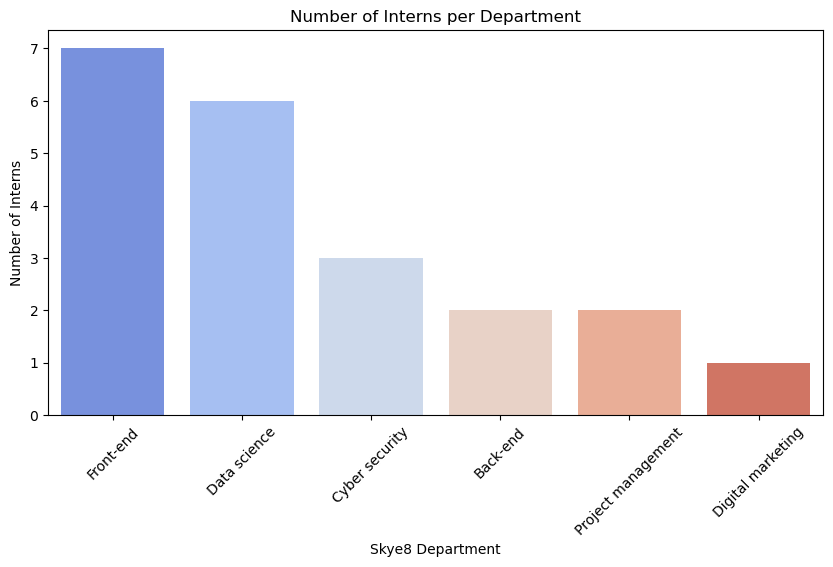

In [17]:
# Count interns per department
dept_counts = df2["department"].value_counts()

# Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Skye8 Department")
plt.ylabel("Number of Interns")
plt.title("Number of Interns per Department")
plt.show()


School  COLTECH  HICM  HIPDET  NAHPI
Gender                              
Female        1     1       1      4
Male          6     1       0      5


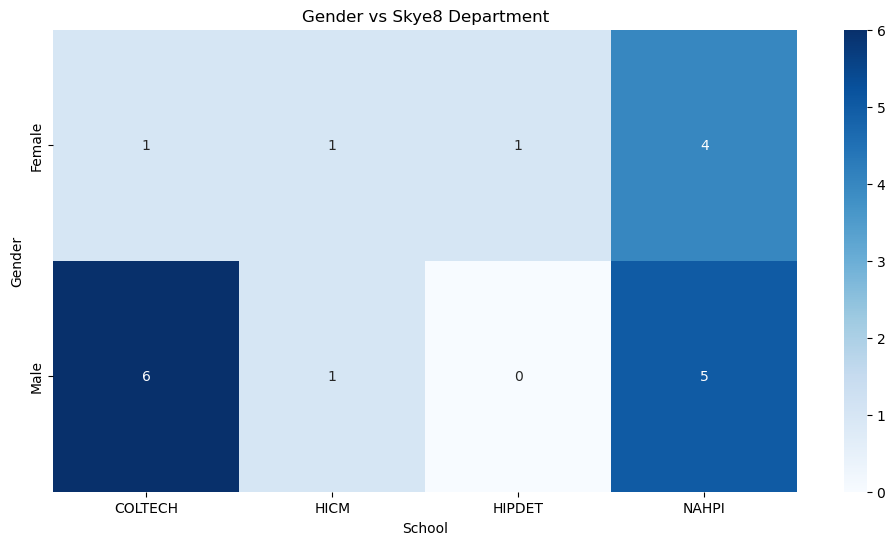

In [45]:
dept_mapping = df2.groupby([df1["Gender"], df1["School"]]).size().unstack(fill_value=0)


print(dept_mapping.head())
plt.figure(figsize=(12, 6))
sns.heatmap(dept_mapping, cmap="Blues", annot=True, fmt="d")
plt.title("Gender vs Skye8 Department")
plt.show()


In [60]:
# Convert Start_Date to datetime
df1["Start Date"] = pd.to_datetime(df1["Start Date"])

# Count interns per start date
start_counts = df1.groupby("Start Date").size().reset_index(name="Intern_Count")

# Filter where more than 1 intern started
same_start_dates = start_counts[start_counts["Intern_Count"] >= 1]
print(same_start_dates)




# Convert Start_Date to datetime
df1["End Date"] = pd.to_datetime(df1["End Date"])

# Count interns per start date
end_counts = df1.groupby("End Date").size().reset_index(name="Intern_Count")

# Filter where more than 1 intern Ended
same_end_dates = end_counts[end_counts["Intern_Count"] >= 1]
print(same_end_dates)


   Start Date  Intern_Count
0  2024-11-19             1
1  2025-02-12             1
2  2025-02-18             6
3  2025-02-19             1
4  2025-02-20             1
5  2025-02-21             1
6  2025-02-25             2
7  2025-03-01             2
8  2025-03-18             1
9  2025-03-19             2
10 2025-11-03             1
     End Date  Intern_Count
0  2025-02-18             1
1  2025-03-22             3
2  2025-03-28             1
3  2025-03-29             2
4  2025-03-31             2
5  2025-05-01             1
6  2025-05-18             2
7  2025-08-29             1
8  2025-08-30             1
9  2025-09-19             2
10 2025-09-20             1
11 2025-09-30             1
12 2025-11-09             1


C:\Users\Dell\AppData\Local\Temp\ipykernel_15568\807801756.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_15568\807801756.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


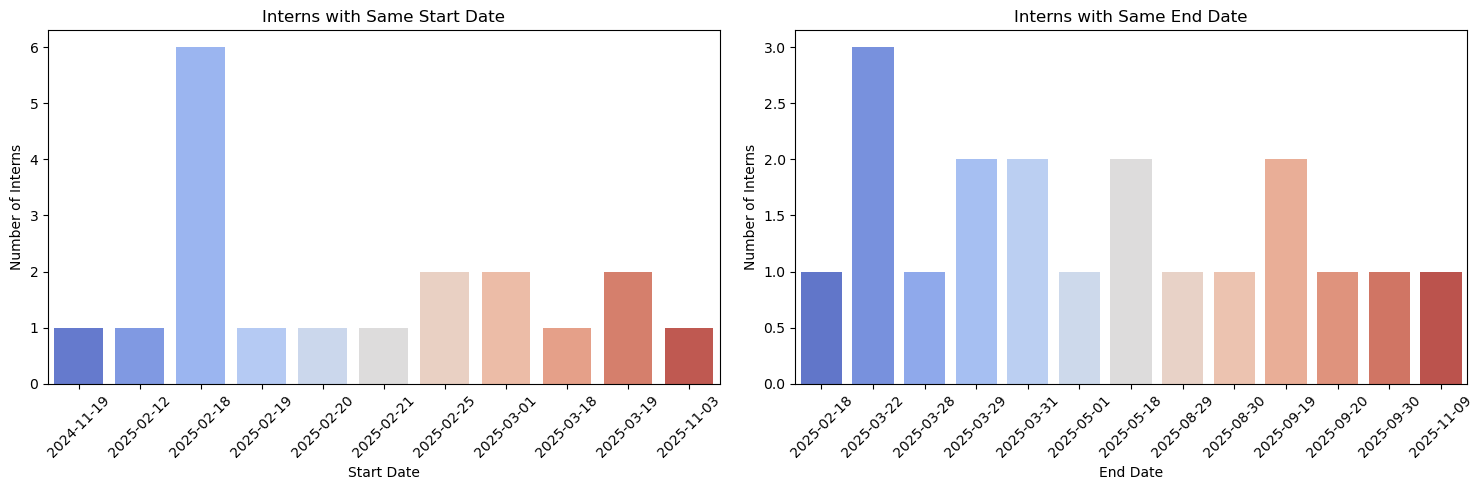

In [61]:
# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First subplot for Start Dates
plt.subplot(1, 2, 1)
sns.barplot(
    data=same_start_dates,
    x='Start Date',
    y='Intern_Count',
    palette="coolwarm"
)
plt.xticks(rotation=45)
plt.xlabel("Start Date")
plt.ylabel("Number of Interns")
plt.title("Interns with Same Start Date")

# Second subplot for End Dates
plt.subplot(1, 2, 2)
sns.barplot(
    data=same_end_dates,
    x='End Date',
    y='Intern_Count',
    palette="coolwarm"
)
plt.xticks(rotation=45)
plt.xlabel("End Date")
plt.ylabel("Number of Interns")
plt.title("Interns with Same End Date")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
